In [20]:
import os
import re
import csv
import requests
from tqdm import tqdm

# === CONFIGURATION ===
# Directory containing the tool output files.
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/random1000/"

# Output CSV file to create.
output_csv = "librs_random.csv"

# Base URL for checking presence on lib.rs
lib_rs_base = "https://lib.rs/crate/"

# Regular expression to extract crate name and version from the filename.
# For example, "uci-0.2.3" will yield:
#   - crate_base: "uci"
#   - version: "0.2.3"
pattern = re.compile(r'^(.*)-(\d+\.\d+\.\d+)$')

# Open the CSV file for writing and write the header.
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Crate Name", "Severity Label", "On lib.rs"])

    # Process each report file and write the result immediately.
    for filename in tqdm(os.listdir(reports_dir), desc="Processing reports"):
        file_path = os.path.join(reports_dir, filename)
        # Skip if not a file.
        if not os.path.isfile(file_path):
            print("Invalid file:", filename)
            continue

        # Get the filename without extension.
        match = pattern.match(filename)
        if not match:
            print("Filename doesn't match expected pattern:", filename)
            continue

        # Extract the crate base and version.
        crate_base = match.group(1)  # e.g. "uci" from "uci-0.2.3"
        version = match.group(2)
        # For reporting, we keep the full crate name (filename without extension).
        full_crate = filename

        # Read the file content to extract the severity label.
        with open(file_path, 'r') as f:
            content = f.read()
        match_label = re.search(r'Severity Label:\s*(\S+)', content)
        severity = match_label.group(1).strip() if match_label else "UNKNOWN"

        # Build the lib.rs URL using only the crate base (without version).
        lib_rs_url = f"{lib_rs_base}{crate_base}"
        try:
            response = requests.get(lib_rs_url)
            # print("response:", response.status_code, lib_rs_url)
            on_lib_rs = "Yes" if response.status_code == 200 else "No"
        except Exception as e:
            print(f"Error checking {lib_rs_url}: {e}")
            on_lib_rs = "No"

        # Write the result row to the CSV.
        writer.writerow([full_crate, severity, on_lib_rs])

print(f"Output CSV created: {output_csv}")


Processing reports: 100%|██████████| 960/960 [14:48<00:00,  1.08it/s]

Output CSV created: librs_random.csv


In [21]:
import os
import re
from tqdm import tqdm

# === CONFIGURATION ===
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/random1000/"
# File to log invalid file names (optional)
log_file = "invalid_reports_random1000.txt"

# Expected header pattern
pattern = re.compile(r'Analysis Report for (.+)')

# List to hold names of files that don't match the pattern
invalid_files = []

# Iterate over all files in the reports directory.
for filename in tqdm(os.listdir(reports_dir), desc="Scanning reports"):
    file_path = os.path.join(reports_dir, filename)
    # Skip non-files
    if not os.path.isfile(file_path):
        continue
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        invalid_files.append(filename)
        continue

    if not pattern.search(content):
        invalid_files.append(filename)

# Print out the names of files that did not match the expected header.
if invalid_files:
    print("The following files do not contain the expected header:")
    for f in invalid_files:
        print(f)
else:
    print("All files contain the expected header.")

# Optionally, write the list to a log file.
with open(log_file, 'w') as f:
    for name in invalid_files:
        f.write(f"{name}\n")
print(f"List of invalid files written to {log_file}.")


Scanning reports: 100%|██████████| 960/960 [00:00<00:00, 10494.10it/s]

The following files do not contain the expected header:
mdbook-trace-0.1.1
pkg-utils-0.1.0
bellhop-auth-header-0.2.1
mdbook-tera-backend-0.0.1
photon-indexer-0.50.0
neo3-0.1.9
iroh-docs-0.34.0
emu_core-0.1.1
mdbook-theme-0.1.6
mdbook-tocjs-0.1.4
bellhop-demo-0.2.1
arecibo-0.1.1
bellhop-hook-jenkins-0.2.1
air-interpreter-data-0.17.2
mdbook-toc-0.14.2
bellhop-auth-dummy-0.2.1
deathframe-0.5.1
rarity-0.3.0
iroh-blobs-0.34.0
solana-install-1.18.26
thebook-0.3.0
bevy_light_field-0.8.0
drt-tools-0.2.28
iroh-doctor-0.33.0
napi-package-template-0.1.0
iroh-cli-0.28.1
veryfi-1.0.0
daleth_lsp-0.1.1
bellhop-0.2.1
emu_driver-0.1.0
iroh-bitswap-0.2.0
mdbook-tailwindcss-0.1.1
dameng-helper-0.2.4
mdbook-templates-0.1.0
gwmp-mux-0.11.0
gwdiff-1.0.0
deb-rust-0.1.2
mdbook-tag-0.0.2
solana-include-idl-cli-0.1.0
solana-test-validator-2.2.3
neo4j-0.2.0
nu_plugin_xpath-0.44.0
nuance-0.3.2
mdbook-tailor-0.8.2
iroh-embed-0.2.0
mdbook-tera-0.5.1
iroh-0.34.0
mdbook-tagger-0.2.0
mdbook-tabs-0.2.1
solana-tokens-2.

In [22]:
import os
import re
import csv
import requests
from tqdm import tqdm

# === CONFIGURATION ===
# Directory containing the tool output files.
reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/rustsec/"

# Output CSV file to create.
output_csv = "librs_rustsec.csv"

# Base URL for checking presence on lib.rs
lib_rs_base = "https://lib.rs/crate/"

# Regular expression to extract crate name and version from the filename.
pattern = re.compile(r'^(.*)-(\d+\.\d+\.\d+)$')

# Open the CSV file for writing and write the header.
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Crate Name", "Severity Label", "On lib.rs"])

    # Process each report file and write the result immediately.
    for filename in tqdm(os.listdir(reports_dir), desc="Processing reports"):
        file_path = os.path.join(reports_dir, filename)
        # Skip if not a file.
        if not os.path.isfile(file_path):
            print("Invalid file:", filename)
            continue

        # Use the same pattern as in the previous snippet to extract crate base and version.
        match = pattern.match(filename)
        if not match:
            print("Filename doesn't match expected pattern:", filename)
            continue

        crate_base = match.group(1)  # e.g. "bellande_rust_import" from "bellande_rust_import-0.0.1"
        full_crate = filename  # Keep the full crate name as the filename

        # Read the file content to extract the severity label.
        with open(file_path, 'r') as f:
            content = f.read()
        match_label = re.search(r'Severity Label:\s*(\S+)', content)
        severity = match_label.group(1).strip() if match_label else "UNKNOWN"

        # Build the lib.rs URL using only the crate base (without version).
        lib_rs_url = f"{lib_rs_base}{crate_base}"
        try:
            response = requests.get(lib_rs_url)
            on_lib_rs = "Yes" if response.status_code == 200 else "No"
        except Exception as e:
            print(f"Error checking {lib_rs_url}: {e}")
            on_lib_rs = "No"

        # Write the result row to the CSV.
        writer.writerow([full_crate, severity, on_lib_rs])

print(f"Output CSV created: {output_csv}")


Processing reports:  15%|█▌        | 89/582 [01:18<06:52,  1.19it/s]

Filename doesn't match expected pattern: libgit2-sys-0.16.1+1.7.1


Processing reports:  73%|███████▎  | 424/582 [06:40<02:50,  1.08s/it]

Filename doesn't match expected pattern: ash-0.33.0+1.2.186


Processing reports:  81%|████████  | 472/582 [07:24<01:48,  1.02it/s]

Filename doesn't match expected pattern: phonenumber-0.3.5+8.13.36


Processing reports:  86%|████████▌ | 498/582 [07:50<01:37,  1.16s/it]

Filename doesn't match expected pattern: openssl-src-300.0.11+3.0.7


Processing reports: 100%|██████████| 582/582 [09:07<00:00,  1.06it/s]

Output CSV created: librs_rustsec.csv


In [23]:
import os
import re
from tqdm import tqdm


reports_dir = "/Users/hassnain/Desktop/oopsla/cargo-sherlock/evaluation/rq3/rustsec/"
log_file = "invalid_reports_rustsec.txt"

# Expected header pattern
pattern = re.compile(r'Analysis Report for (.+)')

# List to hold names of files that don't match the pattern
invalid_files = []

# Iterate over all files in the reports directory.
for filename in tqdm(os.listdir(reports_dir), desc="Scanning reports"):
    file_path = os.path.join(reports_dir, filename)
    # Skip non-files
    if not os.path.isfile(file_path):
        continue
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        invalid_files.append(filename)
        continue

    if not pattern.search(content):
        invalid_files.append(filename)

# Print out the names of files that did not match the expected header.
if invalid_files:
    print("The following files do not contain the expected header:")
    for f in invalid_files:
        print(f)
else:
    print("All files contain the expected header.")

# Optionally, write the list to a log file.
with open(log_file, 'w') as f:
    for name in invalid_files:
        f.write(f"{name}\n")
print(f"List of invalid files written to {log_file}.")


Scanning reports: 100%|██████████| 582/582 [00:00<00:00, 14058.31it/s]

The following files do not contain the expected header:
routing-0.37.1
gix-index-0.32.1
svix-1.16.0
late-static-0.3.0
safe_vault-0.20.2
rocket-0.4.6
safe-nd-0.11.7
orbtk-0.3.0
safe_app-0.18.1
windows-0.31.0
sequoia-openpgp-1.20.0
cargo-download-0.1.2
ouch-0.2.0
spl-token-swap-3.0.0
openpgp-card-sequoia-0.2.2
crust-0.32.1
crayon-0.7.1
safe-api-0.15.1
gix-worktree-0.33.1
gix-worktree-state-0.16.0
tremor-script-0.11.5
mail-internals-0.2.3
nphysics3d-0.24.0
r2d2_odbc-0.5.0
nphysics2d-0.24.0
safe_core-0.43.1
lzw-0.10.0
List of invalid files written to invalid_reports_rustsec.txt.


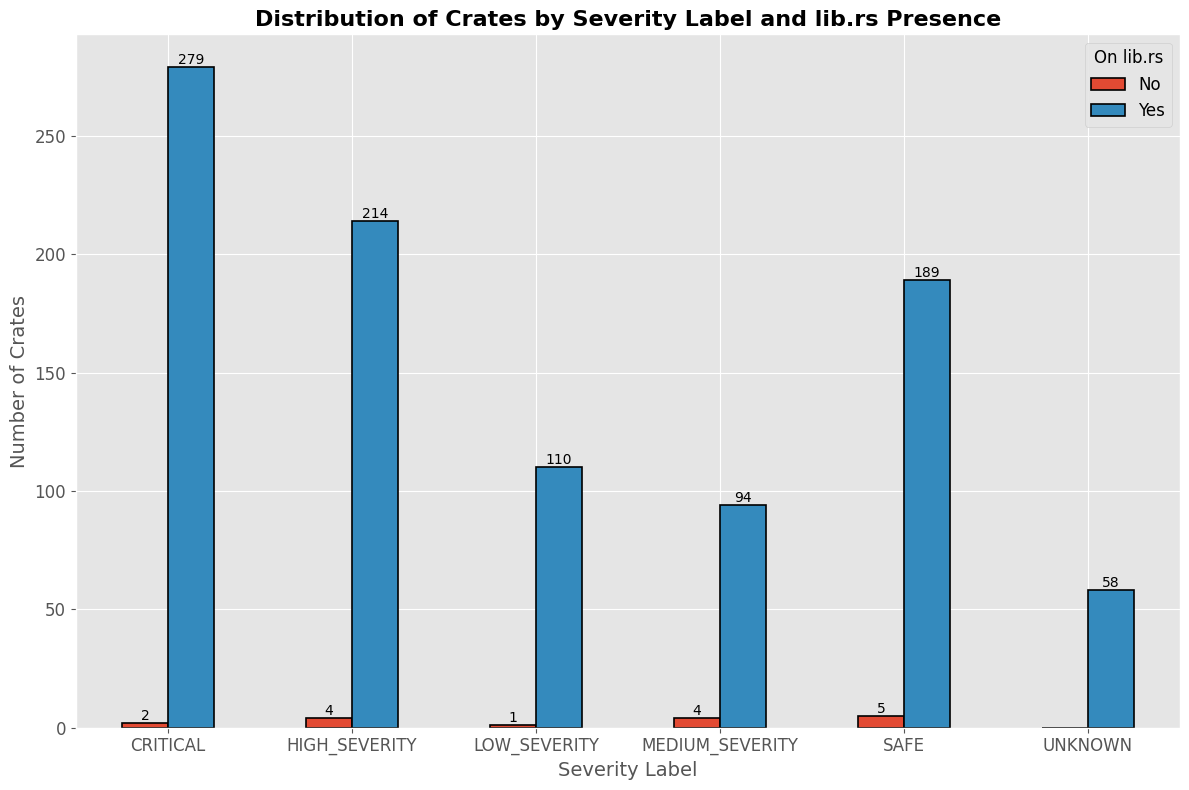

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a nice matplotlib style for improved aesthetics.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_random.csv')

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

# Create a new figure and axis for the plot.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and labels with larger, bold fonts.
ax.set_title("Distribution of Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its height value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


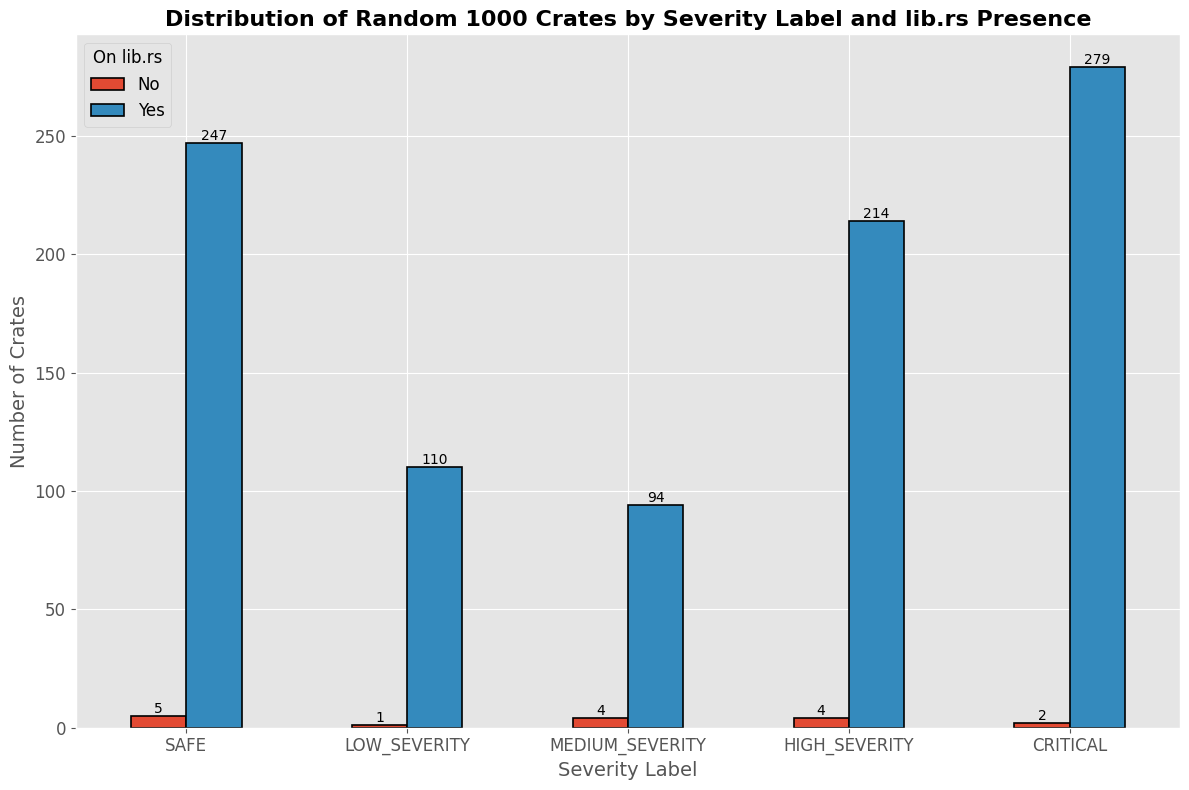

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a pleasing style.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_random.csv')

# Replace 'UNKNOWN' with 'SAFE' to merge these categories.
df['Severity Label'] = df['Severity Label'].replace('UNKNOWN', 'SAFE')
# df = df[df['Severity Label'] != 'UNKNOWN']

desired_order = ['SAFE', 'LOW_SEVERITY', 'MEDIUM_SEVERITY', 'HIGH_SEVERITY', 'CRITICAL']

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

counts = counts.reindex(desired_order, fill_value=0)

# Create a new figure and axis.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart with edge colors for clarity.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and axis labels.
ax.set_title("Distribution of Random 1000 Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/random1000.pdf", bbox_inches='tight') 
plt.show()


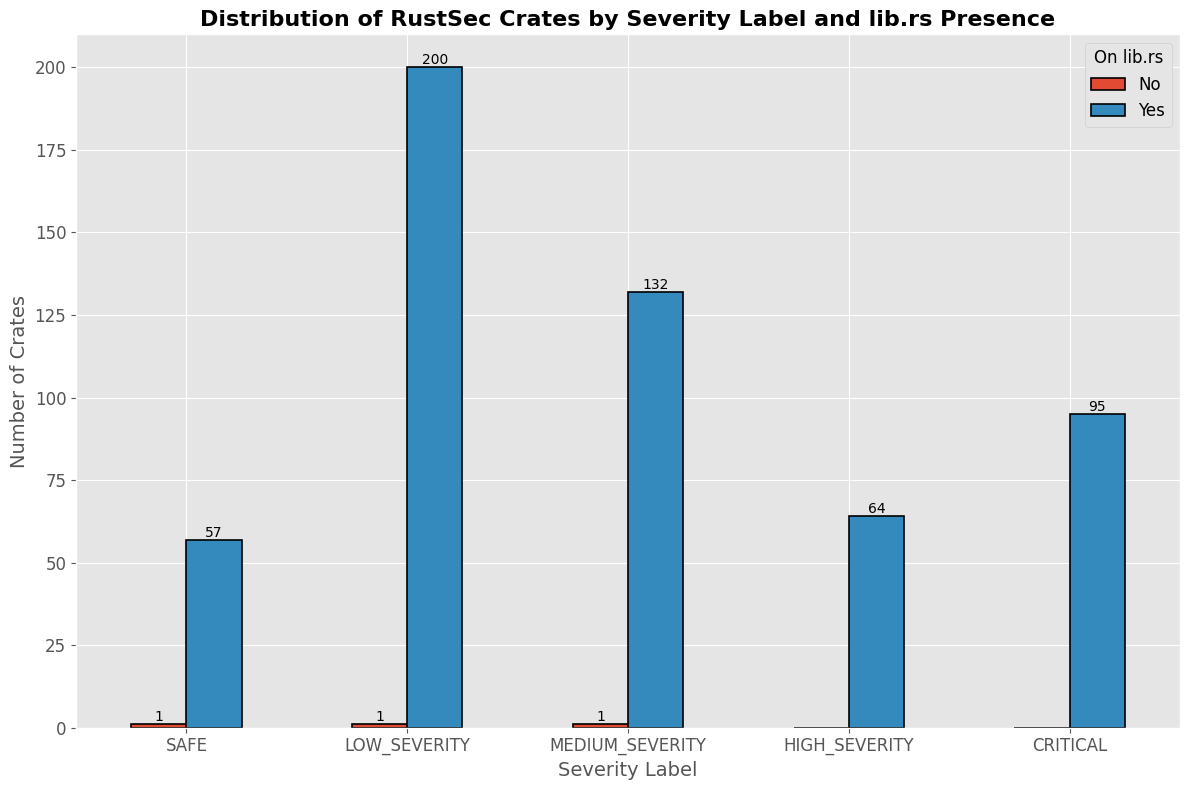

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a pleasing style.
plt.style.use('ggplot')

# Load the CSV data.
df = pd.read_csv('librs_rustsec.csv')

# Replace 'UNKNOWN' with 'SAFE' to merge these categories.
# df['Severity Label'] = df['Severity Label'].replace('UNKNOWN', 'SAFE')
df = df[df['Severity Label'] != 'UNKNOWN']

# Define the desired severity order.
desired_order = ['SAFE', 'LOW_SEVERITY', 'MEDIUM_SEVERITY', 'HIGH_SEVERITY', 'CRITICAL']

# Group data by severity label and lib.rs presence.
counts = df.groupby(['Severity Label', 'On lib.rs']).size().unstack(fill_value=0)

# Reindex the grouped data to enforce the x-axis order.
# fill_value=0 handles any missing categories that might not appear in the dataset.
counts = counts.reindex(desired_order, fill_value=0)

# Create a new figure and axis.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a grouped bar chart with edge colors for clarity.
counts.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.2)

# Add a title and axis labels.
ax.set_title("Distribution of RustSec Crates by Severity Label and lib.rs Presence", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="On lib.rs", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each bar with its value.
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec.pdf", bbox_inches='tight') 
plt.show()


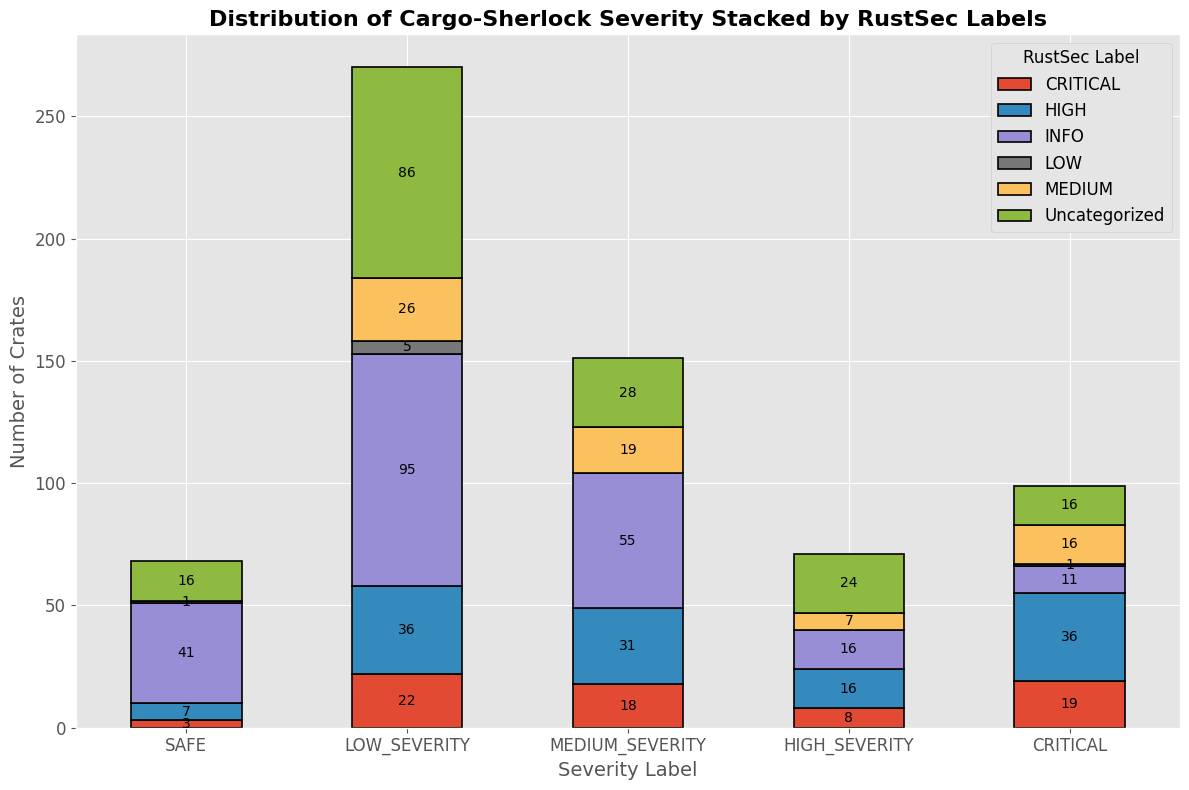

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the first CSV (RustSec data).
df1 = pd.read_csv("rustsec_labels.csv")  
# Columns: crate_name, rustsec_label, advisory_type
# Example row:
# humantime,Uncategorized,INFOUnmaintained

# 2. Read the second CSV (lib.rs data).
df2 = pd.read_csv("librs_rustsec.csv")
# Columns: Crate Name, Severity Label, On lib.rs
# Example row:
# uci-0.2.3,HIGH_SEVERITY,Yes

# 3. Parse crate_name in df2 by stripping the trailing version (split on the last dash).
def parse_name(s: str) -> str:
    # If the crate name includes a dash, split on the last dash
    if "-" in s:
        # e.g. "arelith_combat_simulator-1.5.1" -> ("arelith_combat_simulator", "1.5.1")
        parts = s.rsplit("-", 1)
        return parts[0]
    else:
        # If no dash, assume the entire string is the crate name
        return s

df2["crate_name"] = df2["Crate Name"].apply(parse_name)

# 4. Merge both data sets on "crate_name".
#    - "how='left'" ensures we keep all rows from df2 (lib.rs data),
#      even if there's no match in df1 (RustSec).
df_merged = pd.merge(
    df2,
    df1,
    on="crate_name",
    how="left",
    suffixes=("_lib", "_rs")  # to avoid column name clashes
)

# 5. If not found in the first CSV, rustsec_label is NaN, so label it as "Not in RustSec".
df_merged["rustsec_label"] = df_merged["rustsec_label"].fillna("Not in RustSec")

# 6. Group by [Severity Label, rustsec_label] and pivot for stacked bar plotting.
counts = df_merged.groupby(["Severity Label", "rustsec_label"]).size().unstack(fill_value=0)

# 7. Reindex the rows (Severity Label) to enforce the desired order on the x-axis.
desired_order = ["SAFE", "LOW_SEVERITY", "MEDIUM_SEVERITY", "HIGH_SEVERITY", "CRITICAL"]
counts = counts.reindex(desired_order, fill_value=0)

# 8. Plot a stacked bar chart.
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=1.2)

# 9. Add a title and axis labels.
ax.set_title("Distribution of Cargo-Sherlock Severity Stacked by RustSec Labels", fontsize=16, fontweight='bold')
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)

# Format tick labels.
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Customize the legend.
legend = ax.legend(title="RustSec Label", fontsize=12, title_fontsize=12)
legend.get_frame().set_alpha(0.9)

# Annotate each segment with its value.
for container in ax.containers:
    # Build a list of labels: use the integer if > 0, otherwise an empty string
    labels = [f"{int(bar.get_height())}" if bar.get_height() > 0 else "" for bar in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec-distribution.pdf", bbox_inches='tight') 
plt.show()


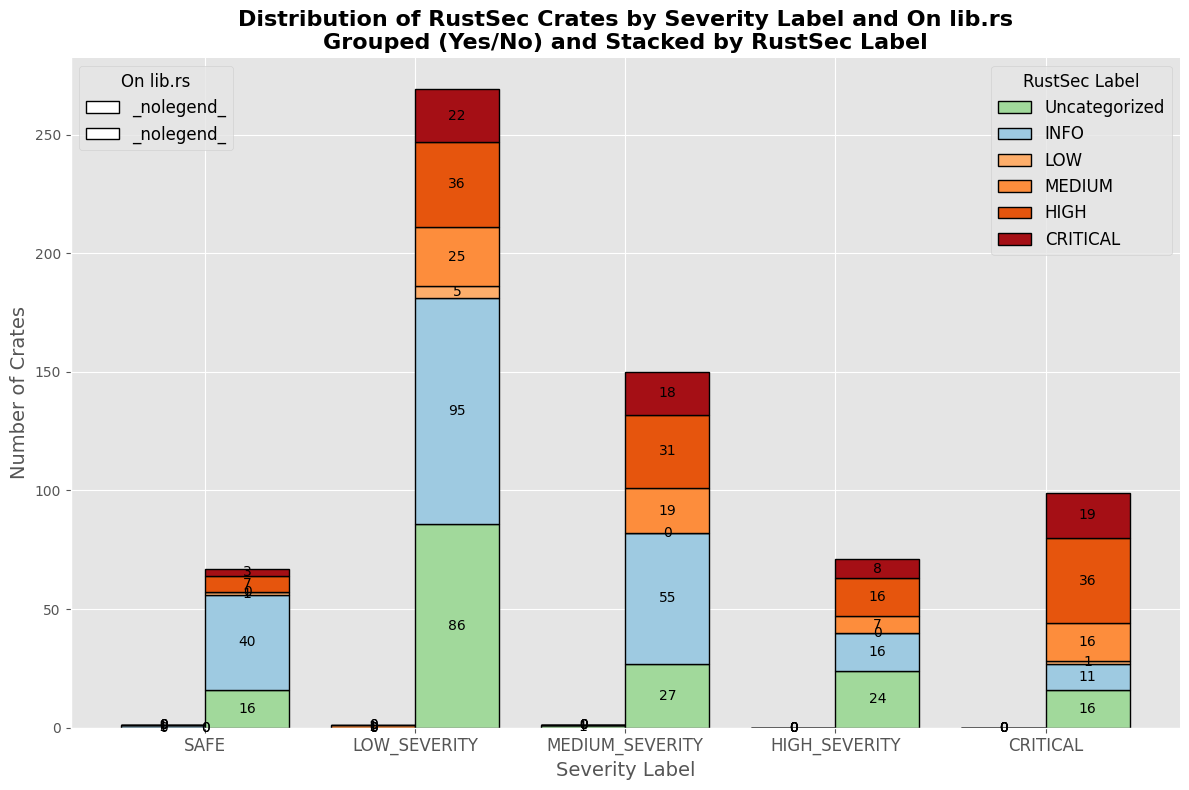

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ─────────────────────────────────────────────────────────────────────────────
# 1. Read your CSV files
# ─────────────────────────────────────────────────────────────────────────────
df1 = pd.read_csv("rustsec_labels.csv")
# columns: [crate_name, rustsec_label, advisory_type, ...]

df2 = pd.read_csv("librs_rustsec.csv")
# columns: [Crate Name, Severity Label, On lib.rs, ...]

# ─────────────────────────────────────────────────────────────────────────────
# 2. Parse crate names in df2 by stripping trailing version (split on last dash)
# ─────────────────────────────────────────────────────────────────────────────
def parse_name(s: str) -> str:
    # Example: "arelith_combat_simulator-1.5.1" -> "arelith_combat_simulator"
    if "-" in s:
        parts = s.rsplit("-", 1)
        return parts[0]
    return s

df2["crate_name"] = df2["Crate Name"].apply(parse_name)

# ─────────────────────────────────────────────────────────────────────────────
# 3. Merge on crate_name; label missing RustSec entries as "Not in RustSec"
# ─────────────────────────────────────────────────────────────────────────────
df_merged = pd.merge(
    df2,
    df1,
    on="crate_name",
    how="left",
    suffixes=("_lib", "_rs")
)
df_merged["rustsec_label"] = df_merged["rustsec_label"].fillna("Not in RustSec")

# ─────────────────────────────────────────────────────────────────────────────
# 4. Group by (Severity Label, On lib.rs, rustsec_label), then count
# ─────────────────────────────────────────────────────────────────────────────
grouped = df_merged.groupby(
    ["Severity Label", "On lib.rs", "rustsec_label"]
).size().reset_index(name="count")

# Desired order on x-axis
severity_order = ["SAFE", "LOW_SEVERITY", "MEDIUM_SEVERITY", "HIGH_SEVERITY", "CRITICAL"]
on_lib_values = ["No", "Yes"]  # We'll create 2 bars per severity label
# All distinct RustSec labels in the data
rustsec_labels = grouped["rustsec_label"].unique().tolist()

# Optional: If you want a specific order for rustsec_labels, define it here:
preferred_label_order = [
    "Not in RustSec",
    "Uncategorized",
    "INFO",
    "LOW",
    "MEDIUM",
    "HIGH",
    "CRITICAL"
]
# Filter out any that are not in the data and keep only those that appear
rustsec_labels = [lbl for lbl in preferred_label_order if lbl in rustsec_labels]

# ─────────────────────────────────────────────────────────────────────────────
# 5. Manual plotting of “grouped + stacked” bars
# ─────────────────────────────────────────────────────────────────────────────
plt.style.use("ggplot")  # or any built-in style except those not installed
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(severity_order))  # X positions for each severity label
bar_width = 0.4                     # Width of each bar
offset_factor = [-0.5, 0.5]         # So that bars (No, Yes) center around each x

# A color map for the RustSec labels
color_map = {
    "Not in RustSec": "#bdbdbd",
    "Uncategorized":  "#a1d99b",
    "INFO":           "#9ecae1",
    "LOW":            "#fdae6b",
    "MEDIUM":         "#fd8d3c",
    "HIGH":           "#e6550d",
    "CRITICAL":       "#a50f15"
}

# We’ll keep track of legend handles for two separate legends:
yesno_handles = []        # For the "On lib.rs" legend
rustsec_handles = {}      # For each rustsec_label color

for i, on_lib in enumerate(on_lib_values):
    # Shift bar positions so that "No" and "Yes" bars sit side-by-side
    x_positions = x + offset_factor[i] * bar_width
    
    # Create a dummy bar just to show in the "On lib.rs" legend
    # We'll do it once for each on_lib value
    yesno_bar = ax.bar(0, 0, color="white", edgecolor="black", linewidth=1.0,
                       label=on_lib)
    yesno_handles.append(yesno_bar[0])
    
    # We'll keep track of the cumulative height at each x-position for stacking
    bottom_heights = np.zeros(len(severity_order))
    
    # Plot each rustsec_label as a stacked segment
    for rust_label in rustsec_labels:
        # Gather the counts for each severity label
        bar_heights = []
        for sev_i, sev_label in enumerate(severity_order):
            row = grouped[
                (grouped["Severity Label"] == sev_label) &
                (grouped["On lib.rs"] == on_lib) &
                (grouped["rustsec_label"] == rust_label)
            ]
            if not row.empty:
                bar_heights.append(row["count"].values[0])
            else:
                bar_heights.append(0)
        
        # Draw this segment
        color = color_map.get(rust_label, "#888888")
        bars = ax.bar(
            x_positions,
            bar_heights,
            bar_width,
            bottom=bottom_heights,
            color=color,
            edgecolor="black",
            linewidth=1.0
        )
        
        # Update bottom heights for next segment
        bottom_heights += bar_heights
        
        # Add a label handle for the rustsec_label legend if not added yet
        if rust_label not in rustsec_handles:
            bars.set_label(rust_label)
            rustsec_handles[rust_label] = bars

# ─────────────────────────────────────────────────────────────────────────────
# 6. Aesthetics: Axis labels, title, ticks, legends
# ─────────────────────────────────────────────────────────────────────────────
ax.set_xticks(x)
ax.set_xticklabels(severity_order, fontsize=12)
ax.set_xlabel("Severity Label", fontsize=14)
ax.set_ylabel("Number of Crates", fontsize=14)
ax.set_title("Distribution of RustSec Crates by Severity Label and On lib.rs\nGrouped (Yes/No) and Stacked by RustSec Label",
             fontsize=16, fontweight="bold")

# Remove top/right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Build two legends:
# 1) On lib.rs
legend_onlib = ax.legend(handles=yesno_handles, title="On lib.rs", fontsize=12, title_fontsize=12, loc="upper left")
ax.add_artist(legend_onlib)

# 2) RustSec Label
rustsec_handles_list = list(rustsec_handles.values())
legend_rustsec = ax.legend(handles=rustsec_handles_list, title="RustSec Label",
                           fontsize=12, title_fontsize=12, loc="upper right")

# Annotate each stacked segment with its value
for bars in ax.containers:
    ax.bar_label(bars, label_type="center", fmt="%d", fontsize=10)

plt.tight_layout()
plt.show()


In [41]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


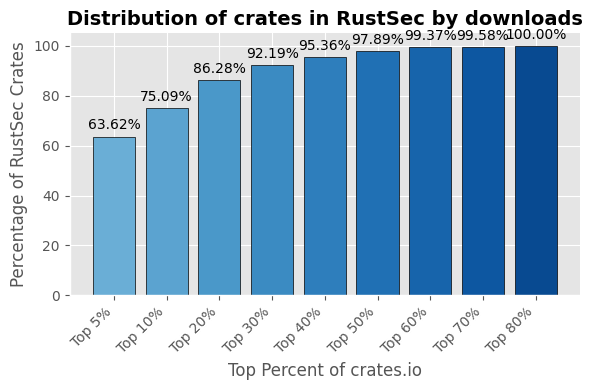

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the table
data = {
    "Top Percent of crates.io": [
        "Top 5%", "Top 10%", "Top 20%", "Top 30%", "Top 40%", 
        "Top 50%", "Top 60%", "Top 70%", "Top 80%"
    ],
    "Percentage of RustSec Crates": [
        63.62, 75.09, 86.28, 92.19, 95.36, 97.89, 99.37, 99.58, 100.00
    ]
}

df = pd.DataFrame(data)

# Use a pleasant style.
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(6, 4))

# Create a numeric index for bars
x = np.arange(len(df))

# Generate a gradient of blues for the bars
bar_colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(df)))

# Plot a bar chart
bars = ax.bar(x, df["Percentage of RustSec Crates"], 
              color=bar_colors, edgecolor="black")

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(df["Top Percent of crates.io"], rotation=45, ha="right")

# Axis labels and title
ax.set_xlabel("Top Percent of crates.io", fontsize=12)
ax.set_ylabel("Percentage of RustSec Crates", fontsize=12)
ax.set_title("Distribution of crates in RustSec by downloads", 
             fontsize=14, fontweight="bold")

# Remove top/right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Annotate each bar with its value, skipping 0 if any
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=10)

plt.tight_layout()
# plt.savefig("rustsec-percentiles.pdf", bbox_inches="tight")
plt.savefig("/Users/hassnain/Desktop/rhs-paper/src/img/evaluation/rq3/rustsec-percentiles.pdf", bbox_inches="tight")
plt.show()
